# Population collapse?


## Goals of this notebook

1. Look at the general trends of population, fertility rate and life expectancy
2. Check whether happiness rating has anything to do with these trends
3. Predict future trends on fertility rate and life expectancy


# Table of Contents
1. [Importing Libraries](#importing-libraries)
1. [Downloading Data](#downloading-data)
1. [Data Cleaning](#data-cleaning)
    * [Happiness data fix](#concatination-of-happiness-data)
    * [Clean](#fixing-formating)
1. [Visualization](#visualization)
1. [Multi-variate Analysis](#multivariate-analysis)


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
%matplotlib inline  

# Downloading Data

In [141]:
country_population = pd.read_csv('data/country_population.csv')
life_expectancy = pd.read_csv('data/life_expectancy.csv')
fertility_rate = pd.read_csv('data/fertility_rate.csv')
health_and_nutrition = pd.read_csv('data/health_and_nutrition.csv')
gdp = pd.read_csv('./data/GDP/gdp.csv')
gdp_growth = pd.read_csv('./data/GDP/gdp_growth.csv')
happiness_2015 = pd.read_csv('data/Happiness/2015.csv')
happiness_2016 = pd.read_csv('data/Happiness/2016.csv')
happiness_2017 = pd.read_csv('data/Happiness/2017.csv')
happiness_2018 = pd.read_csv('data/Happiness/2018.csv')
happiness_2019 = pd.read_csv('data/Happiness/2019.csv')

# Data Cleaning

## Concatination of happiness data

In [21]:
happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017
happiness_2018['Year'] = 2018
happiness_2019['Year'] = 2019
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


In [22]:
happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [65]:
happiness = pd.concat([happiness_2015, happiness_2016])
happiness.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
152,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,3.404,3.564
153,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,3.288,3.432
154,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.192,3.414
155,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,2.936,3.202
156,Burundi,Sub-Saharan Africa,157,2.905,NaN,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404,2016,2.732,3.078


In [24]:
happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [48]:
columns_2017 = happiness_2017.columns.to_list()
columns_2017.append(columns_2017.pop(columns_2017.index('Whisker.low')))
columns_2017.append(columns_2017.pop(columns_2017.index('Whisker.high')))
a,b =  columns_2017.index('Generosity'), columns_2017.index('Trust..Government.Corruption.')
columns_2017[a], columns_2017[b] = columns_2017[b], columns_2017[a]

print(len(columns_2017))
for i in columns_2017:
    print(i)

13
Country
Happiness.Rank
Happiness.Score
Economy..GDP.per.Capita.
Family
Health..Life.Expectancy.
Freedom
Trust..Government.Corruption.
Generosity
Dystopia.Residual
Year
Whisker.low
Whisker.high


In [49]:
happiness_columns = happiness.drop(['Region', 'Standard Error'], axis=1).columns.to_list()
print(len(happiness_columns))
for i in happiness_columns:
    print(i)

13
Country
Happiness Rank
Happiness Score
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual
Year
Lower Confidence Interval
Upper Confidence Interval


In [52]:
length = len(columns_2017)
replace_dict = {columns_2017[i]:happiness_columns[i] for i in range(length)}
print(replace_dict)

{'Country': 'Country', 'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 'Family': 'Family', 'Health..Life.Expectancy.': 'Health (Life Expectancy)', 'Freedom': 'Freedom', 'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Generosity': 'Generosity', 'Dystopia.Residual': 'Dystopia Residual', 'Year': 'Year', 'Whisker.low': 'Lower Confidence Interval', 'Whisker.high': 'Upper Confidence Interval'}


In [56]:
happiness_2017.rename(colVumns=replace_dict, inplace=True)
happiness_2017

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [69]:
happiness = pd.concat([happiness, happiness_2017])
happiness.tail()
happiness.loc[(happiness['Country'] == 'Philippines')]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.705320,1.035160,0.581140,0.625450,0.122790,0.249910,1.753600,2015,NaN,NaN
81,Philippines,Southeastern Asia,82,5.279,NaN,0.812170,0.878770,0.470360,0.548540,0.117570,0.216740,2.234840,2016,5.160000,5.398000
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335


In [70]:
happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [78]:

columns_2018 = happiness_2018.columns.to_list()
a,b =  columns_2018.index('Overall rank'), columns_2018.index('Country or region')
columns_2018[a], columns_2018[b] = columns_2018[b], columns_2018[a]
a,b =  columns_2018.index('Generosity'), columns_2018.index('Perceptions of corruption')
columns_2018[a], columns_2018[b] = columns_2018[b], columns_2018[a]

print(len(columns_2018))
for i in columns_2018:
    print(i)

10
Country or region
Overall rank
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Perceptions of corruption
Generosity
Year


In [75]:
happiness_columns = happiness.drop(['Region', 'Standard Error', 'Lower Confidence Interval',
                                   'Upper Confidence Interval', 'Dystopia Residual'], axis=1).columns.to_list()
print(len(happiness_columns))
for i in happiness_columns:
    print(i)


10
Country
Happiness Rank
Happiness Score
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Year


In [79]:

length = len(columns_2018)
replace_dict = {columns_2018[i]:happiness_columns[i] for i in range(length)}
print(replace_dict)

{'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Social support': 'Family', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)', 'Generosity': 'Generosity', 'Year': 'Year'}


In [81]:

happiness_2018.rename(columns=replace_dict, inplace=True)
happiness_2018

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...,...,...
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,2018
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,2018
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,2018
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,2018


In [82]:

happiness = pd.concat([happiness, happiness_2018])
happiness.tail()
happiness.loc[(happiness['Country'] == 'Philippines')]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.705320,1.035160,0.581140,0.625450,0.122790,0.249910,1.753600,2015,NaN,NaN
81,Philippines,Southeastern Asia,82,5.279,NaN,0.812170,0.878770,0.470360,0.548540,0.117570,0.216740,2.234840,2016,5.160000,5.398000
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
70,Philippines,NaN,71,5.524,NaN,0.775000,1.312000,0.513000,0.643000,0.105000,0.120000,NaN,2018,NaN,NaN


In [83]:
happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [96]:
columns_2019 = happiness_2019.columns.to_list()
a, b = columns_2019.index(
    'Overall rank'), columns_2019.index('Country or region')
columns_2019[a], columns_2019[b] = columns_2019[b], columns_2019[a]
a, b = columns_2019.index('Generosity'), columns_2019.index(
    'Perceptions of corruption')
columns_2019[a], columns_2019[b] = columns_2019[b], columns_2019[a]

print(len(columns_2019))
for i in columns_2019:
    print(i)


10
Country or region
Overall rank
Score
GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Perceptions of corruption
Generosity
Year


In [97]:
happiness_columns = happiness.drop(['Region', 'Standard Error', 'Lower Confidence Interval',
                                   'Upper Confidence Interval', 'Dystopia Residual'], axis=1).columns.to_list()
print(len(happiness_columns))
for i in happiness_columns:
    print(i)


10
Country
Happiness Rank
Happiness Score
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Year


In [98]:

length = len(columns_2019)
replace_dict = {columns_2019[i]:happiness_columns[i] for i in range(length)}
print(replace_dict)

{'Country or region': 'Country', 'Overall rank': 'Happiness Rank', 'Score': 'Happiness Score', 'GDP per capita': 'Economy (GDP per Capita)', 'Social support': 'Family', 'Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom', 'Perceptions of corruption': 'Trust (Government Corruption)', 'Generosity': 'Generosity', 'Year': 'Year'}


In [100]:

happiness_2019.rename(columns=replace_dict, inplace=True)
happiness_2019

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,2019
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,2019
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2019


In [101]:

happiness = pd.concat([happiness, happiness_2019])
happiness.tail()
happiness.loc[(happiness['Country'] == 'Philippines')]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.705320,1.035160,0.581140,0.625450,0.122790,0.249910,1.753600,2015,NaN,NaN
81,Philippines,Southeastern Asia,82,5.279,NaN,0.812170,0.878770,0.470360,0.548540,0.117570,0.216740,2.234840,2016,5.160000,5.398000
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
70,Philippines,NaN,71,5.524,NaN,0.775000,1.312000,0.513000,0.643000,0.105000,0.120000,NaN,2018,NaN,NaN
68,Philippines,NaN,69,5.631,NaN,0.807000,1.293000,0.657000,0.558000,0.107000,0.117000,NaN,2019,NaN,NaN


In [106]:
happiness.drop_duplicates(inplace=True)
happiness.loc[(happiness['Country'] == 'Philippines')]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.705320,1.035160,0.581140,0.625450,0.122790,0.249910,1.753600,2015,NaN,NaN
81,Philippines,Southeastern Asia,82,5.279,NaN,0.812170,0.878770,0.470360,0.548540,0.117570,0.216740,2.234840,2016,5.160000,5.398000
71,Philippines,NaN,72,5.430,NaN,0.857699,1.253918,0.468009,0.585215,0.099332,0.193513,1.972605,2017,5.314665,5.545335
70,Philippines,NaN,71,5.524,NaN,0.775000,1.312000,0.513000,0.643000,0.105000,0.120000,NaN,2018,NaN,NaN
68,Philippines,NaN,69,5.631,NaN,0.807000,1.293000,0.657000,0.558000,0.107000,0.117000,NaN,2019,NaN,NaN


## Fixing formating

In [142]:
country_population.head()
fertility_rate.head()
life_expectancy.head()
gdp.head()

#health_and_nutrition.head()

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [165]:
population_fix = country_population.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Population')
fertility_rate_fix = fertility_rate.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Fertility Rate')
life_expectancy_fix = life_expectancy.melt(
    id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='Year', value_name='Life Expectancy')
gdp_fix = gdp.melt(id_vars=['Country Name', 'Code'], var_name='Year', value_name='GDP' )
gdp_growth_fix = gdp_growth.melt(id_vars=['Country Name', 'Code'], var_name='Year', value_name='GDP Growth' )
# health_and_nutrition_fix = health_and_nutrition.melt(id_vars=['Country Name','Country Code', 'Indicator Name','Indicator Code'], var_name='Year', value_name='Population')
# health_and_nutrition_fix

population_fix = population_fix.drop(
    ['Indicator Name', 'Indicator Code'], axis=1)
fertility_rate_fix = fertility_rate_fix.drop(
    ['Indicator Name', 'Indicator Code'], axis=1)
life_expectancy_fix = life_expectancy_fix.drop(
    ['Indicator Name', 'Indicator Code'], axis=1)
gdp_fix =gdp_fix.rename(columns={'Code':'Country Code'})
gdp_growth_fix =gdp_growth_fix.rename(columns={'Code':'Country Code'})


In [166]:
merge_data = population_fix.copy()
merge_data = merge_data.merge(fertility_rate_fix,how='left',left_on=['Country Name','Year','Country Code'], right_on=['Country Name','Year', 'Country Code'])
merge_data = merge_data.merge(life_expectancy_fix,how='left',left_on=['Country Name','Year','Country Code'], right_on=['Country Name','Year', 'Country Code'])
merge_data = merge_data.merge(gdp_fix,how='left',left_on=['Country Name','Year','Country Code'], right_on=['Country Name','Year', 'Country Code'])
merge_data = merge_data.merge(gdp_growth_fix,how='left',left_on=['Country Name','Year','Country Code'], right_on=['Country Name','Year', 'Country Code'])

In [267]:
merge_data.drop_duplicates(inplace=True)
merge_data.head()

,Country Name,Country Code,Year,Population,Fertility Rate,Life Expectancy,GDP,GDP Growth
0,Aruba,ABW,1960,54211.0,4.820,65.662,NaN,NaN
1,Afghanistan,AFG,1960,8996351.0,7.450,32.292,5.377778e+08,NaN
2,Angola,AGO,1960,5643182.0,7.478,33.251,NaN,NaN
3,Albania,ALB,1960,1608800.0,6.489,62.279,NaN,NaN
4,Andorra,AND,1960,13411.0,NaN,NaN,NaN,NaN


# Visualization

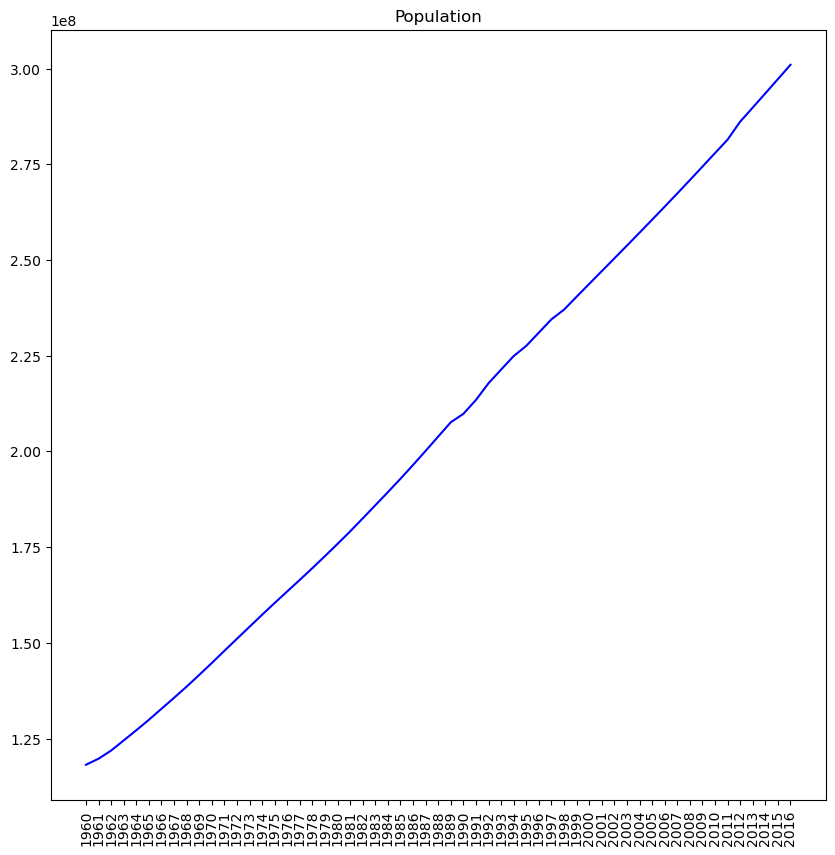

In [367]:

merge_data
summary=merge_data.groupby('Year').mean()
plt.figure(figsize=(10,10))
plt.title("Population")
plt.xticks(rotation=90)
plt.plot(summary.index, summary['Population'], color='blue')

There is still an uptrend for the world population

### Adding a Population Growth column for the summary

In [455]:
def percent_change(x):
    return ( x[1] - x[0]) /x[0] * 100

summary['Population Growth'] = summary['Population'].rolling(window=2).apply(lambda x: percent_change(x))
summary.loc[summary.index.astype(int) == 1990]


,Population,Fertility Rate,Life Expectancy,GDP,GDP Growth,Population Growth
Year,,,,,,
1990,2.098121e+08,3.95874,64.65647,7.637019e+11,3.401637,1.058359


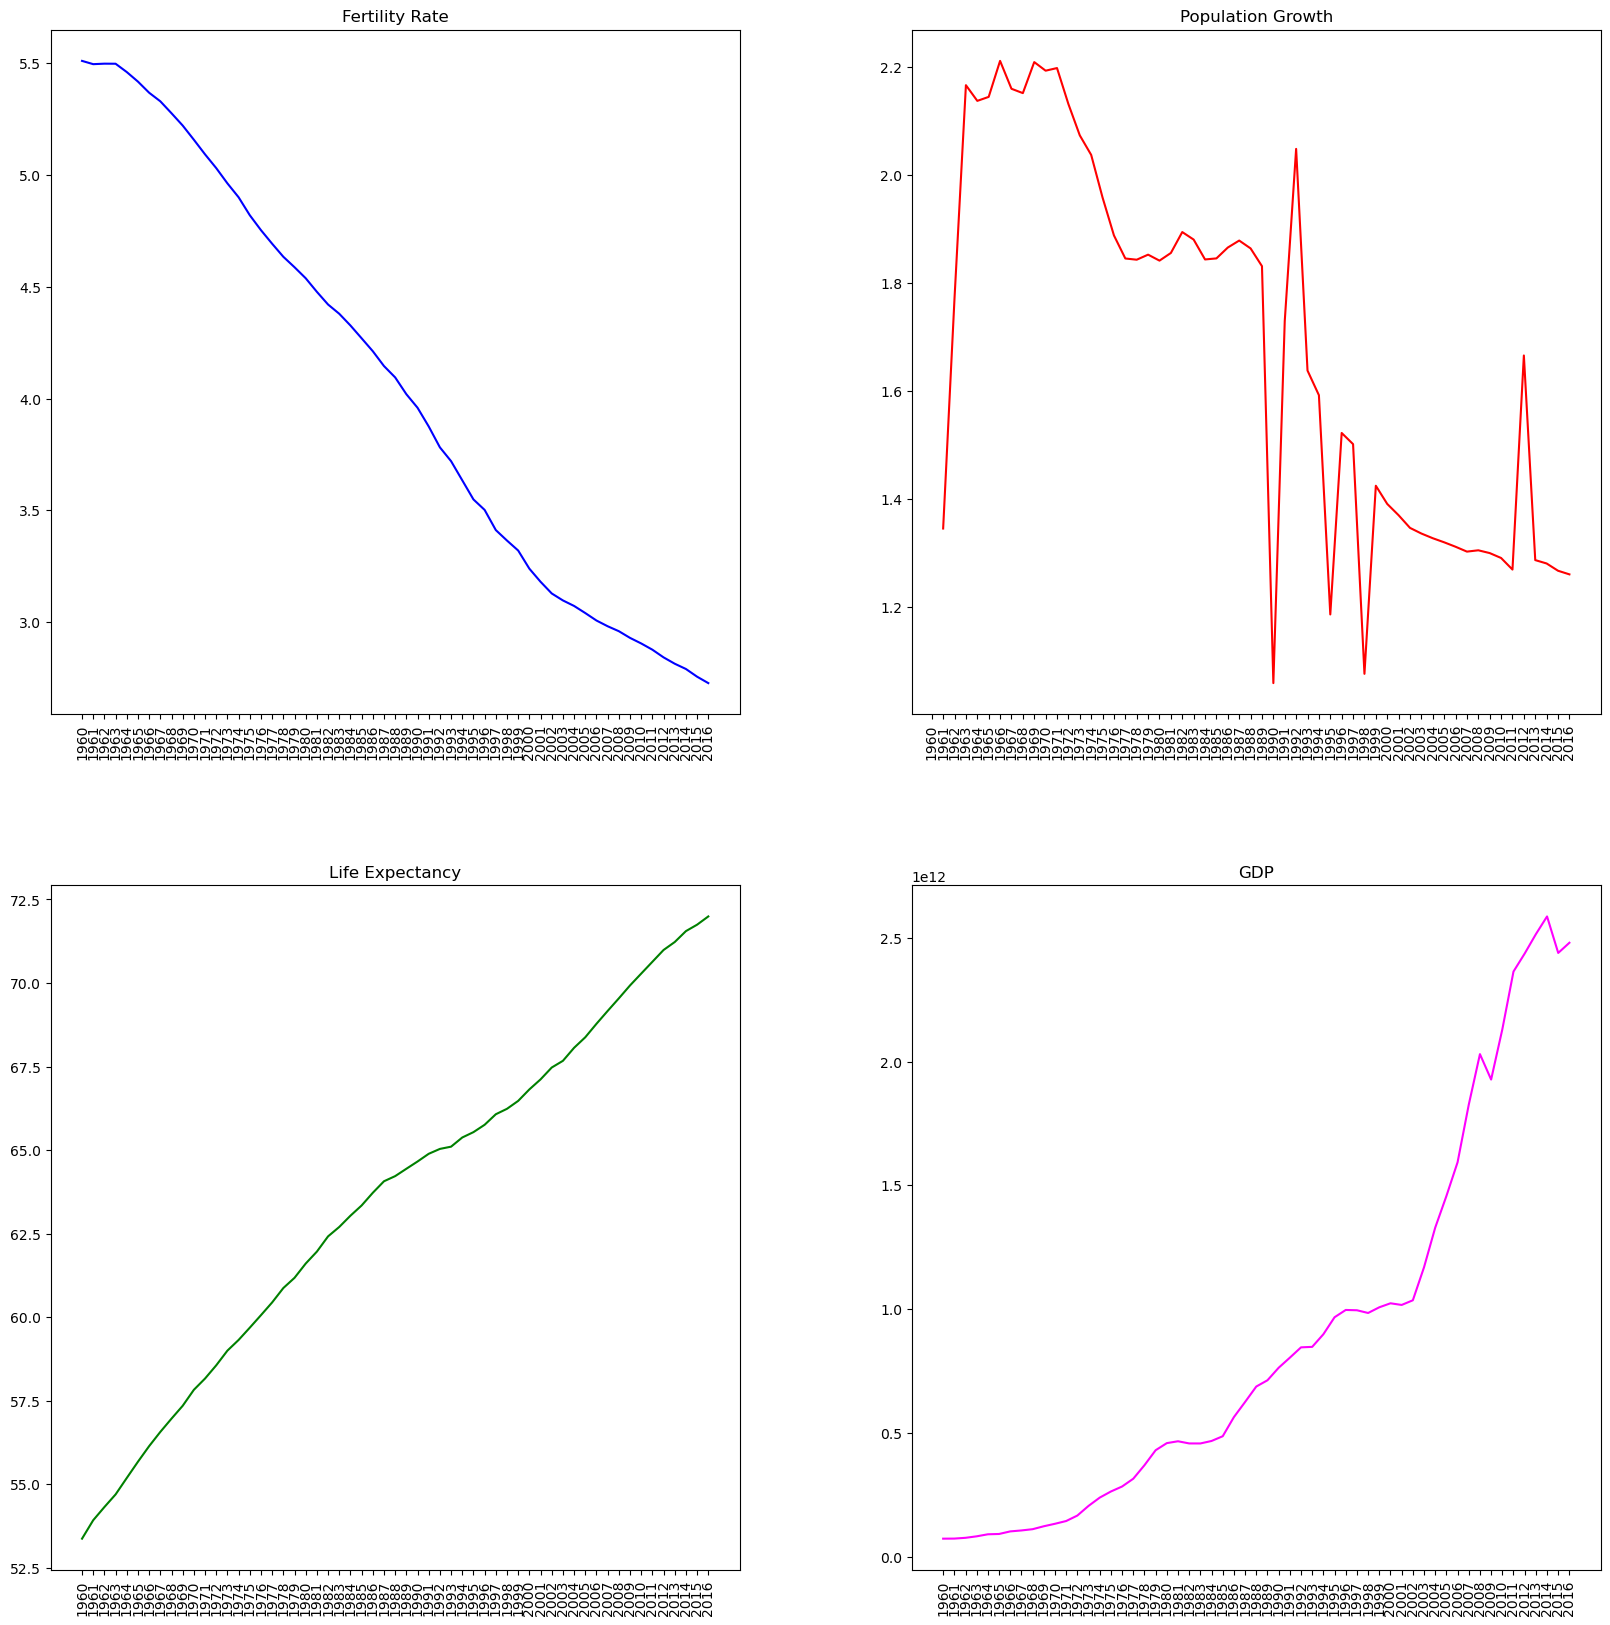

In [410]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(hspace=0.25)
'''
    This create a 2 x 2 plot 
    and defining the TEMP as the subplot in the 1st slot 
'''
plt.subplot(2, 2, 1)
plt.title("Fertility Rate")
plt.xticks(rotation=90)
plt.plot(summary.index, summary['Fertility Rate'], color='blue')
'''
    This create a 2 x 2 plot 
    and defining the WIND as the subplot in the 2nd slot 
'''
plt.subplot(2, 2, 2)
plt.title("Population Growth")
plt.xticks(rotation=90)
plt.plot(summary.index, summary['Population Growth'], color='red')
'''
    This create a 2 x 2 plot 
    and defining the HUMIDITY as the subplot in the 3rd slot 
'''
plt.subplot(2, 2, 3)
plt.title("Life Expectancy")
plt.xticks(rotation=90)
plt.plot(summary.index, summary['Life Expectancy'], color='green')
'''
    This create a 2 x 2 plot 
    and defining the PRECIPITATION as the subplot in the 4th slot 
'''
plt.subplot(2, 2, 4)
plt.title("GDP")
plt.xticks(rotation=90)
plt.plot(summary.index, summary['GDP'], color='magenta')


In [411]:
fig = plt.figure()
# ax1 = fig.add_subplot()
# for name, group in df.groupby('Country Name'):
#     group.plot('Year', y='Population',ax=ax1, label=name)


<Figure size 640x480 with 0 Axes>

Data has too many countries. Will get top 5-10 and bottom 5-10 based on happiness

In [456]:
happiness_rating = happiness.groupby(['Country']).mean().sort_values(by='Happiness Score')
happiness_rating

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,,
Burundi,153.80,3.07900,0.08658,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361,2017.00,2.733655,3.076345
Central African Republic,153.25,3.13425,0.06112,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152,2017.25,2.521116,2.864884
Syria,152.60,3.29220,0.05015,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015,2017.00,3.098166,3.432834
South Sudan,150.00,3.38250,NaN,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,2.194429,2017.50,3.526231,3.896769
Rwanda,152.00,3.43860,0.03464,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,0.726224,2017.00,3.421485,3.564515
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Iceland,3.20,7.51100,0.04884,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,2.618698,2017.00,7.359485,7.645515
Switzerland,3.60,7.51140,0.03411,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,2.496242,2017.00,7.427114,7.575886
Finland,3.60,7.53780,0.03140,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231,2017.00,7.380729,7.501271


In [413]:
top_happy = happiness_rating[-3:]
bot_happy = happiness_rating[:4]

In [414]:
bot_list = bot_happy.index.to_list()
top_list = top_happy.index.to_list()


In [415]:

top_happy.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,,
Finland,3.6,7.5378,0.03140,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231,2017.0,7.380729,7.501271
Norway,2.8,7.5410,0.03880,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,2.468996,2017.0,7.450278,7.584722
Denmark,2.2,7.5460,0.03328,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,2.515046,2017.0,7.461136,7.586864


In [416]:

bot_happy.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,,
Burundi,153.80,3.07900,0.08658,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361,2017.00,2.733655,3.076345
Central African Republic,153.25,3.13425,0.06112,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152,2017.25,2.521116,2.864884
Syria,152.60,3.29220,0.05015,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015,2017.00,3.098166,3.432834
South Sudan,150.00,3.38250,NaN,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,2.194429,2017.50,3.526231,3.896769


In [417]:

country_list = ['Japan','United States','Philippines']
happiness[happiness['Country'].isin(country_list)].groupby('Country').mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
Country,,,,,,,,,,,,,
Japan,52.4,5.9258,0.03581,1.337745,1.32700,0.979099,0.493477,0.164842,0.095573,1.617805,2017.0,5.849640,5.991360
Philippines,76.8,5.3874,0.04934,0.791438,1.15457,0.537902,0.592041,0.110338,0.179433,1.987015,2017.0,5.237332,5.471668
United States,15.8,6.9988,0.03839,1.455946,1.32857,0.821615,0.506882,0.140844,0.355080,2.485348,2017.0,6.965672,7.131328


In [418]:
country_list.extend(top_list)
country_list.extend(bot_list)
country_list

['Japan',
 'United States',
 'Philippines',
 'Finland',
 'Norway',
 'Denmark',
 'Burundi',
 'Central African Republic',
 'Syria',
 'South Sudan']

In [439]:
df = merge_data[merge_data['Country Name'].isin(country_list)]
def test(x):
    return ( x.iloc[1] - x.iloc[0]) /x.iloc[0] * 100
'''
for name, group in df.groupby('Country Name'):
    #group['Population'].rolling(window=2).apply(lambda x: percent_change(x))
    group['Population Growth'] = group['Population'].rolling(window=2).apply(lambda x: test(x) )
'''
df

,Country Name,Country Code,Year,Population,Fertility Rate,Life Expectancy,GDP,GDP Growth
14,Burundi,BDI,1960,2786106.0,6.953,41.281000,1.960000e+08,NaN
32,Central African Republic,CAF,1960,1503508.0,5.840,36.489000,1.121556e+08,NaN
56,Denmark,DNK,1960,4579603.0,2.570,72.176585,NaN,NaN
73,Finland,FIN,1960,4429634.0,2.720,68.819756,5.224102e+09,NaN
117,Japan,JPN,1960,92500572.0,2.001,67.666098,4.430734e+10,NaN
...,...,...,...,...,...,...,...,...
14901,Japan,JPN,2016,126994511.0,1.440,83.984878,5.003678e+12,0.753827
14959,Norway,NOR,2016,5236151.0,1.720,82.509756,3.688271e+11,1.071559
14969,Philippines,PHL,2016,103320222.0,2.925,69.094000,3.186268e+11,7.149457
14998,South Sudan,SSD,2016,12230730.0,4.855,56.811000,NaN,NaN


Text(0, 0.5, 'Population Growth Rate')

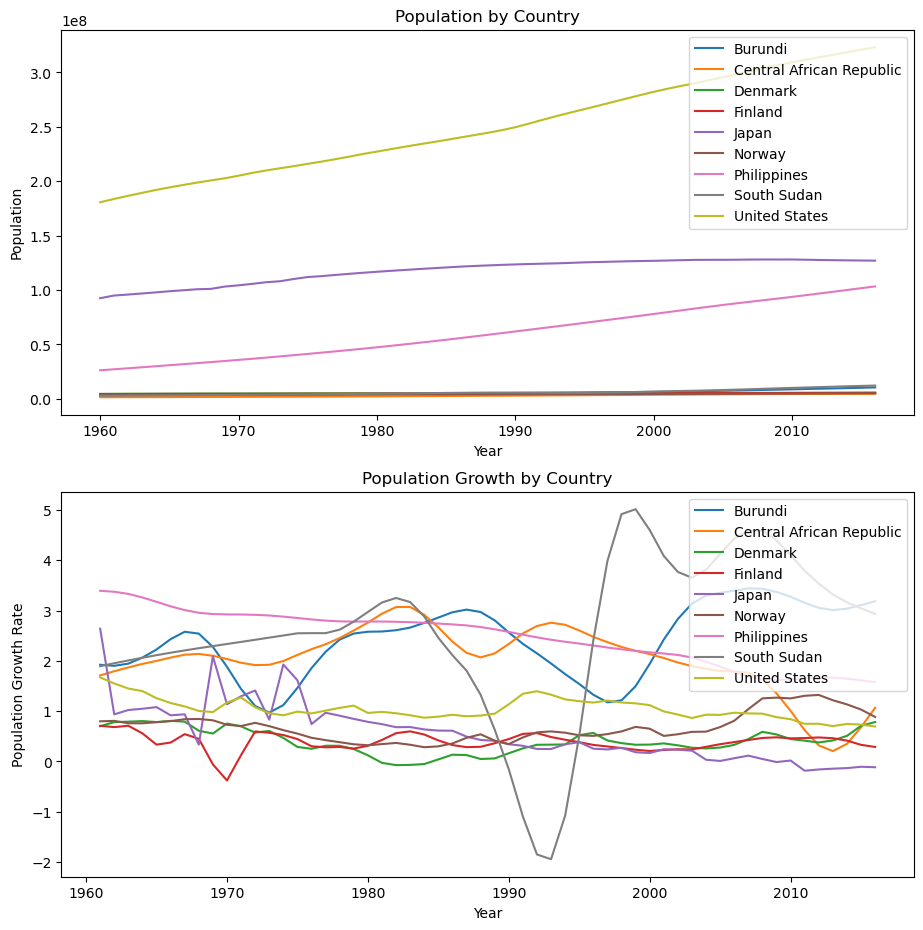

In [437]:
plt.figure(figsize=(11,11))
ax1 = plt.subplot(2,1,1)
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Population', ax=ax1, label=name)
ax1.set_title('Population by Country')
ax1.set_ylabel('Population')
ax2 = plt.subplot(2,1,2)
for name, group in df.groupby('Country Name'):
    group['Population Growth'] = group['Population'].rolling(window=2).apply(lambda x: test(x) )
    group.plot('Year', y='Population Growth', ax=ax2, label=name)
ax2.set_title('Population Growth by Country')
ax2.set_ylabel('Population Growth Rate')



* Japan has a plateuing population
* General downtrend for population growth

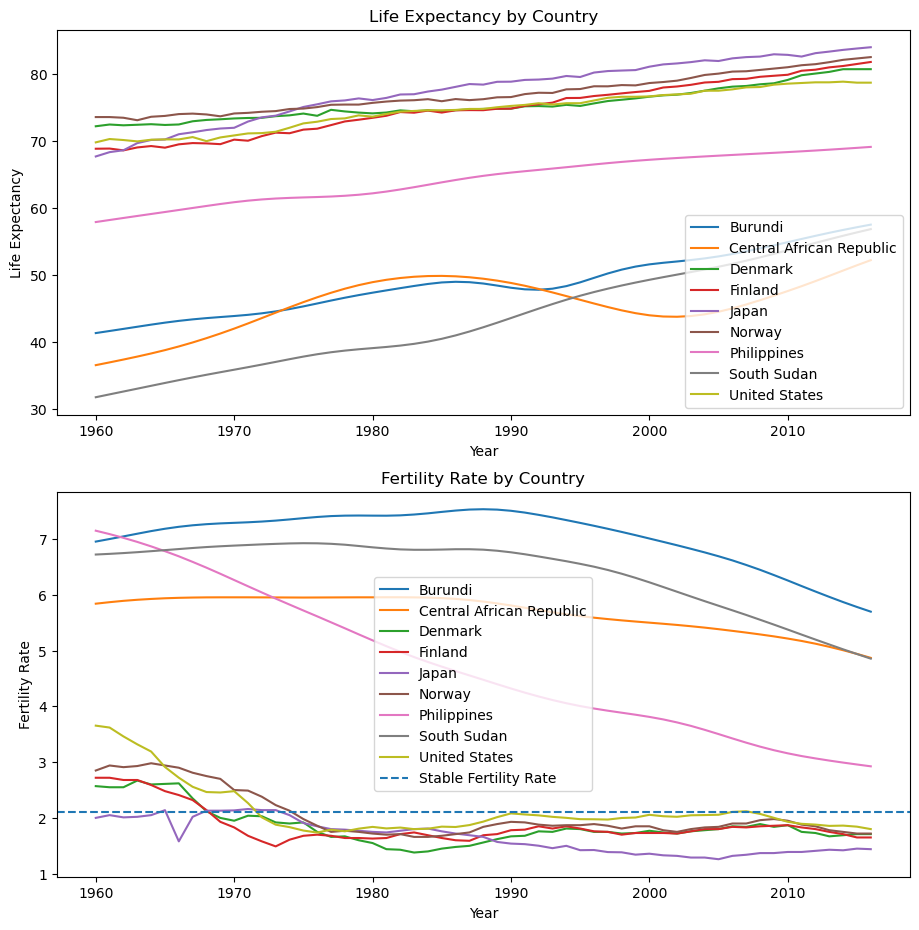

In [519]:
plt.figure(figsize=(11,11))

ax1 = plt.subplot(2,1,1)
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Life Expectancy', ax=ax1, label=name)
ax1.set_title('Life Expectancy by Country')
ax1.set_ylabel('Life Expectancy')

ax2 = plt.subplot(2,1,2)
for name, group in df.groupby('Country Name'):
    group.plot('Year', y='Fertility Rate', ax=ax2, label=name)
ax2.set_title('Fertility Rate by Country')
ax2.set_ylabel('Fertility Rate')
ax2.axhline(2.1, linestyle="--", label="Stable Fertility Rate")

plt.legend()


* High fertility rate for countries that have a low happiness score
* General downtrend of fertility scores


# Multivariate Analysis

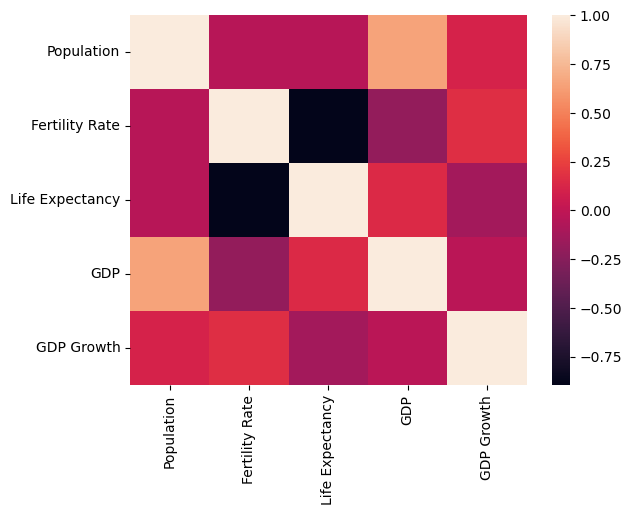

In [494]:
import plotly.express as px
import seaborn as sns
df[df['Country Name'].isin(top_list)]
grouped_df = merge_data.groupby('country name').mean()
corr_heatmap = sns.heatmap(grouped_df.corr())

In [491]:
fig = px.scatter(grouped_df,x='GDP', y='Fertility Rate', color=grouped_df.index)
fig.show()

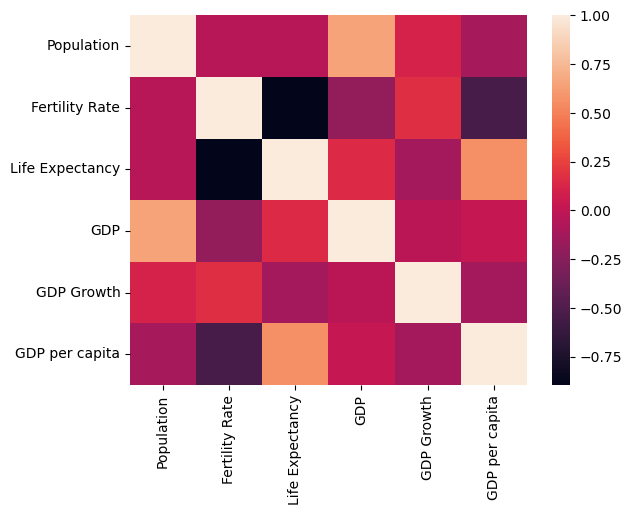

In [496]:
grouped_df['GDP per capita'] = grouped_df['GDP']/grouped_df['Population']

corr_heatmap = sns.heatmap(grouped_df.corr())


In [523]:

fig = px.scatter(grouped_df,x='Fertility Rate', y='GDP per capita', color=grouped_df.index)
fig.show()

In [522]:

fig = px.scatter(grouped_df,x='Life Expectancy', y='GDP per capita', color=grouped_df.index)
fig.show()

In [510]:

fig = px.scatter(grouped_df,x='Life Expectancy', y='Fertility Rate', color=grouped_df.index)
fig.show()

In [521]:
def filter_by_zscore(data, threshold):
    mean = np.mean(data)
    stdev = np.std(data)
    filtered = data[abs((data - mean) / stdev) <= threshold]
    return filtered


filtered_grouped_df = grouped_df.apply(lambda x: filter_by_zscore(x, 3))
filtered_grouped_df

,Population,Fertility Rate,Life Expectancy,GDP,GDP Growth,GDP per capita
Country Name,,,,,,
Afghanistan,1.704045e+07,7.088719,47.882158,6.265400e+09,7.539525,367.678047
Albania,2.700067e+06,3.349105,71.340561,5.944851e+09,2.916108,2201.742097
Algeria,2.453749e+07,5.111684,62.720842,6.149392e+10,3.831858,2506.120635
American Samoa,4.221081e+04,NaN,NaN,5.799333e+08,-0.814662,13738.977629
Andorra,5.020537e+04,1.226000,NaN,1.468281e+09,2.733875,29245.488659
...,...,...,...,...,...,...
West Bank and Gaza,3.198660e+06,5.207407,71.123074,7.118413e+09,5.450314,2225.435823
World,NaN,3.513036,64.103168,NaN,3.574600,5107.818085
"Yemen, Rep.",1.321189e+07,7.170140,53.019228,1.778616e+10,2.170904,1346.223514


In [518]:

fig = px.scatter(filtered_grouped_df,x='Life Expectancy', y='GDP per capita', color=grouped_df.index)
fig.show()

ValueError: All arguments should have the same length. The length of argument `color` is 264, whereas the length of  previously-processed arguments ['Life Expectancy', 'GDP per capita'] is 263

# Forecasting

In [513]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Multiplicative trend / Additive seasonality model
model_mul_add = ExponentialSmoothing(summary['Fertility Rate'], trend='mul', seasonal='add', seasonal_periods=12)
results_mul_add = model_mul_add.fit()
predictions_mul_add = results_mul_add.forecast(steps=24)

# Multiplicative trend / Multiplicative seasonality model
model_mul_mul = ExponentialSmoothing(summary['Fertility Rate'], trend='mul', seasonal='mul', seasonal_periods=12)
results_mul_mul = model_mul_mul.fit()
predictions_mul_mul = results_mul_mul.forecast(steps=24)

# Evaluate
#rmse_mul_add = mean_squared_error(test_df['Passengers'], predictions_mul_add, squared=False)
#rmse_mul_mul = mean_squared_error(test_df['Passengers'], predictions_mul_mul, squared=False)

# Plot
#plt.title(f'Airline passengers Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)} | RMSE (mul, mul) = {np.round(rmse_mul_mul, 2)}', size=20)
plt.plot(summary['Fertility Rate'], label='Training data')
#plt.plot(test_df['Passengers'], color='gray', label='Testing data')
plt.plot(predictions_mul_add, color='orange', label='Predictions Multiplicative trend, Additive seasonality')
plt.plot(predictions_mul_mul, color='red', label='Predictions Multiplicative trend, Multiplicative seasonality')
plt.legend()

c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

c:\Users\ramon.galang\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



TypeError: tzinfo argument must be None or of a tzinfo subclass, not type 'UnitData'

<Figure size 640x480 with 1 Axes>

# Conclusion

* There is a downtrend in fertility rate which could lead to population decline if not remedied
* Fertility rate of a number of countries has fallen below the stable fertility rate of 2.1
* Advancements in medicine which richer countries could afford has lead to higher life expectancy
* Negative correlation between fertility rate and life expectancy could be due to people in higher GDP countries tend to be more busy with work

# Additional Study

* Lower fertility rate could be due to wage inequality and higher costs of living
* Sperm count could also be a factor
* Due to women preffering to focus on careers